## **The Graph Isomorphism Problem**


## Table of Contents
- [Graph Isomorphism Problem Intro](#intro)
- [Simple isomorphic graphs example](#example)
- [Why care about graph isomorphism?](#why-care)
- [Graph isomorphism Algorithms](#algorithms)
- [VF2 Implementation](#vf2)
- [Adjacency Matrices](#adjacency-matrices)

# Graph Isomorphism Problem Intro<a name="intro"></a>

A graph is a mathematical structure that consists of a set of points (vertices) and a set of lines (edges) that connect them. The graph isomorphism problem is a computer science problem that involves checking whether two graphs are isomorphic which means they have the same structure, even if the labels or positions of the vertices are different.

The graph isomorphism problem arises in many fields, including drug discovery, computer science, and social networks. For instance, drug companies use graphs to model drug molecules and apply the graph isomorphism problem to identify new drugs that are similar to existing ones. In computer science, graph isomorphism is used to optimize algorithms, while in social networks, it can help detect similar patterns of connections between users.

By understanding the graph isomorphism problem and developing algorithms to solve it, researchers can better model complex systems and make predictions based on them. However, the problem remains challenging to solve, and even today, there is no efficient algorithm that can solve it for all cases.

# Simple isomorphic graphs example<a name="example"></a>

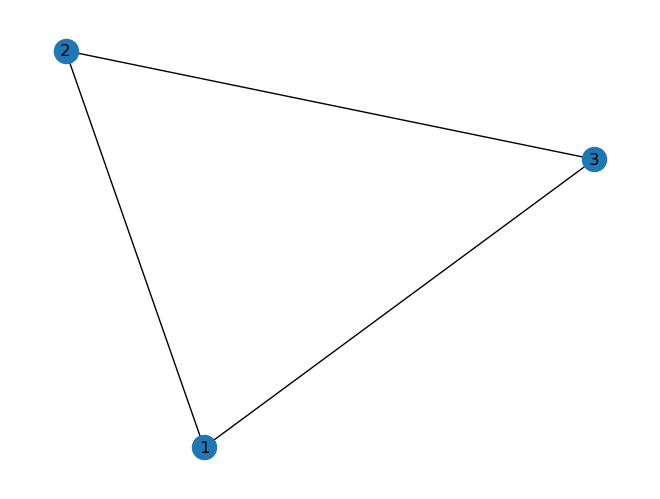

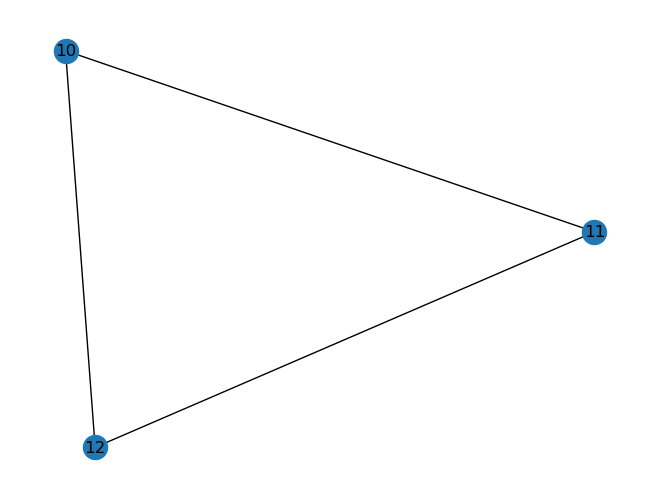

In [79]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the first graph
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3), (3, 1)])
nx.draw(G1, with_labels=True)
plt.show()

# Create the second graph
G2 = nx.Graph()
G2.add_edges_from([(10, 11), (11, 12), (12, 10)])
nx.draw(G2, with_labels=True)
plt.show()

# Why care about graph isomorphism?<a name="why-care"></a>

The example above shows a basic example of an isomorphic graph it is very readable, you can count the number of vertices and edges in each graph and see that both graphs have an identical amount, so why is the graph isomorphism problem so important? The reason the graph isomorphism problem is so important is that in industry the data sets being used are much, much larger. when dealing with n vertices it starts off relatively small and can be understood quite easily like in the above example but the complexity grows very quickly the larger the data sets and you will need to check n! permutations. A simple algorithm would be to check every vertice in one grpah corrisponds to every vertice in another graph, however this leads to exponential time complexity O(2^n)

In [80]:
import itertools

def isomorphic(G1, G2):
    #Check if two graphs are isomorphic by checking all permutations of node labels
    n = G1.number_of_nodes()
    for perm in itertools.permutations(range(n)):
        # Create a dictionary mapping nodes in G1 to nodes in G2 using the permutation of node labels
        node_map = {i: perm[i] for i in range(n)}
        # Check if the permutation of node labels makes G1 isomorphic to G2
        if all(G1.has_edge(u, v) == G2.has_edge(node_map[u], node_map[v]) for u in range(n) for v in range(n)):
            return True
    return False


import networkx as nx

# Create graphs
G1 = nx.Graph()
G2 = nx.Graph()
G3 = nx.Graph()
G4 = nx.Graph()

# Add edges to Graphs
G1.add_edges_from([(1, 2), (2, 3), (3, 1)])
G2.add_edges_from([(4, 5), (5, 6), (6, 4)])

G3.add_edges_from([(1, 2), (2, 3), (3, 1)])
G4.add_edges_from([(2, 3), (1, 2), (3, 1)])

# check if g1 and g2 are isomporphic
if isomorphic(G1, G2):
    print("The graphs g1 and g2 are isomorphic.")
else:
    print("The graphs g1 and g2 are not isomorphic.")

#check if g3 and g4 are isomorphic
if isomorphic(G3, G4):
    print("The graphs g3 and g4 are isomorphic.")
else:
    print("The graphs g3 and g4 are not isomorphic.")


The graphs g1 and g2 are not isomorphic.
The graphs g3 and g4 are isomorphic.


The Above code is an example of a simple brute force algoritm that that checks to see if the graphs g1 and g2 are isomorphic as well as checking to see if g3 and g4 are isomorphic. it does this by first checking to see if the number of nodes in each graphs are equal if not it retiurns false, if they are equal then it iterates over all permutations of the nodes labels of the first graph, and for each permutation, it creates a dictionary that maps the nodes of the first graph to the nodes of the second graph using the permutation of node labels

Then the algorithm compares the edges of all node pairs between the two graphs and then checks to see if the permutations of node labels makes the two graphs isomorphic. the algorithm needs to iterate over every possibility until it finds a permutation that is isomorphic and returns a value of true or until it has fully exhausted all permutations in which case it would return false 

while in principal this algorithm does work its is extremely inefficient and slow with an exponential time complexity, in this example the algorithm appears to run very quickly but these graphs only have three points on each on them, in industry the amount of data would be much greater, for instance if the algorithm was being used for a social media site with hundreds of millions of users all using the site in various ways the algorithm would take an impractical amount of time to run 

# Graph isomorphism Algorithms<a name="algorithms"></a>

Due to the inefficency of manually checking a graph by hand or use a brute force algorithm, more efficient algorithms have been developed with a smaller time complexity, such algorithms are the vf2 algorithm and Weisfeiler-Lehman algorithm. The VF2 algorithm works by taking 2 graphs i.e G1 and G2 we then take the first node in g1 and find all the nodes in g2 with the same degree and map them then we take a second node in G1 and match it with a node in G2 that is compatable with the current mapping, if compatable the algorithm repeats this step, if incompatable the algorithms goes back a step and tries a new node until it succeeds or exhausts all options 

![Diagram displaying a simplified version of how vf2 algorithm works](VF2_image.png)

The above diagram illistrates how the VF2 algorithm works fundementally by creating a tree starting at 0<->0 it then branches off down different paths, if it cannot complete its journey down one branch it reverts back to an old leaf and tries to go down a different branch, repeating this process until it has completed its task or exhausted all possibilitys

# VF2 Implementation<a name="vf2"></a>

In [81]:
import networkx as nx
from networkx.algorithms.isomorphism import GraphMatcher


First we import the Networkx library as well as the Graphmatcher module which gives us access to a method that uses the vf2 algorithm to quickly tell if two graphs are isomorphic

In [82]:

# Create two graphs
G1 = nx.Graph()
G2 = nx.Graph()

Here we create two empty undirected graphs using the nx.graph function from the previously imported networks x library called G1 and G2

In [83]:


# Add nodes and edges to the graphs
G1.add_edges_from([(1, 2), (2, 3), (3, 1)])
G2.add_edges_from([(4, 5), (5, 6), (6, 4)])

Here we add edges to both of the previously created graphs G1 and G2 by passing them a list of tuples each. Each tuple contains two vertices that are connected by the edge

In [84]:

# Check if the graphs are isomorphic
gm = GraphMatcher(G1, G2)

Here we create a GraphMatcher object called gm by passing in the two graphs G1 and G2 as arguments. In this case the GraphMatcher class uses the VF2 algorithm internally to check for isomorphism between the two graphs as the graphs are small in size, when used on larger graphs or graphs with more complex structural features the GraphMatcher function will use the Ullmann algorithm

In [85]:
print(gm.is_isomorphic())

True


Check if the two graphs are isomorphic by calling the is_isomorphic() method on the GraphMatcher object gm

# Adjacency Matrices<a name="#adjacency-matrices"></a>

Adjacency Matrices are a powerful tool used in Graph theory and the Graph isomorphism problem.  A graph can be represented as a matrix by assigning rows and columns to the vertices and filling in the matrix with 1 or 0 depending on whether an edge exists between two vertices

These matrices are important for the graph isomorphism problem because they allow us to compare graphs by looking at their matrices. If two graphs have the same matrix, then they must be isomorphic as long as they contain the same number of nodes. On the other hand if two graphs have different matrices then they cannot be isomorphic. So, these matrices provide a way to quickly and efficiently check if two graphs are isomorphic with each other.

In [86]:
import networkx as nx
import matplotlib.pyplot as plt

# create a graph
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])


# get the adjacency matrix
A = nx.adjacency_matrix(G)



C:\Users\fionn\AppData\Local\Temp\ipykernel_17528\1360707298.py:10: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


This line calculates the adjacency matrix using the networkx library and then displays it

[[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]]


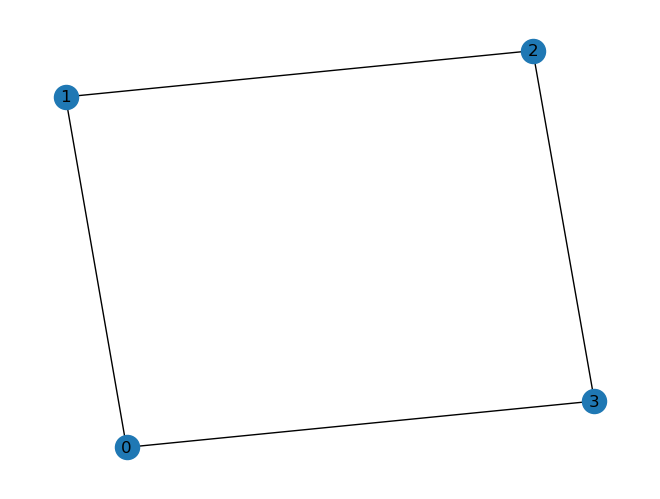

In [87]:


# visualize the graph
nx.draw(G, with_labels=True)
print(A.todense())
plt.show()


# Applications of the graph isomorphism problem

Graph isomorphism problem has various applications in the fields of cryptography and machine learning.

In cryptography, the graph isomorphism problem is used for creating secure key exchange protocols. One such example is the Diffie-Hellman key exchange protocol, which is used to establish a shared secret key between two parties over an insecure communication channel. In this protocol, each party creates a graph and exchanges a public description of the graph with the other party. The parties then use the graph isomorphism problem to verify that they are talking about the same graph. This ensures that the parties are communicating with each other and not an impersonator, thereby establishing a shared secret key that can be used for secure communication.

In machine learning, the graph isomorphism problem is used for graph matching and graph classification. Graph matching involves comparing two graphs to determine if they are the same or different. This is useful in applications such as image recognition, where a given image can be represented as a graph and compared with other images to find similar images. Graph classification involves assigning a label to a graph based on its properties. This is useful in applications such as drug discovery, where molecules can be represented as graphs and classified based on their chemical properties.

Furthermore, graph isomorphism problem is also used in the study of complex networks and social networks. In these fields, the graph isomorphism problem is used to identify similar patterns of connections between nodes and to analyze the structure of large networks. This information can be used to understand the behavior of complex systems and to make predictions based on them.

#Refrences